# 2

This code will generate the value of X and Y

In [162]:
def X_and_y_Generator(xa0,N, dt=0.1,qc = 0.01,R = 0.1,l = 1):
    
    import numpy as np
    np.random.seed(123)
    g=9.81;    
    x = np.zeros((N,2))
    x[0] = xa0
    Q = qc*np.array([[(dt**3)/3, (dt**2)/2],[(dt**2)/2,dt]])
    SqrtQ = np.sqrt(Q)
    for i in range(1,N):
        M = np.array([x[i-1][0]+dt*x[i-1][1], (1-dt)*x[i-1][1]-dt*(g/l)*np.sin(x[i-1][0])])
        sigma = np.random.normal(0,SqrtQ)@np.random.normal(0,1,2)
        x[i] = M+sigma
    y=np.sin(x[:,0])+np.random.normal(0, R, N)
    return x,y,Q

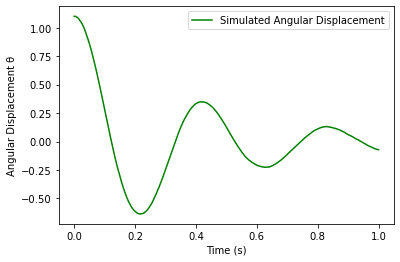

In [187]:
import numpy as np
import matplotlib.pyplot as plt
xa0 =  np.array([1.1, 0])
N = 500
dt=0.01
xx,y,Q = X_and_y_Generator(xa0,N,dt)
t = np.linspace(0,1,500)
x=xx[:,0]
plt.plot(t,x, "g-",label="Simulated Angular Displacement")
plt.xlabel("Time (s)")
plt.ylabel("Angular Displacement θ")
plt.legend()
plt.show()

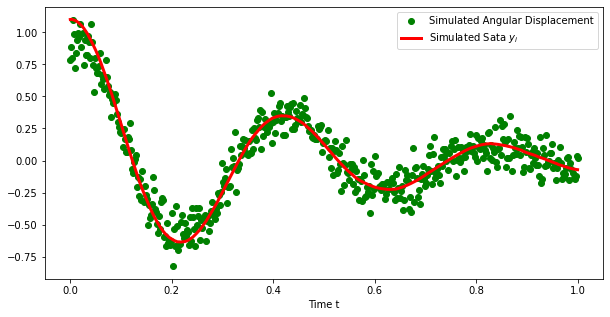

In [191]:
plt.figure(figsize=(10,5))

plt.plot(t,y ,"go",label="Simulated Angular Displacement")
plt.plot(t,x,"r-", label="Simulated Sata $y_i$",linewidth=3)
plt.xlabel("Time t")
plt.legend()
plt.show()

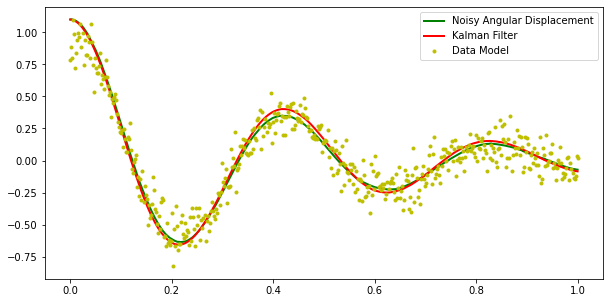

In [195]:

def Kalman(xao, Q, y, R=0.1, dt=0.01, g=9.81, l=1):
    # Kalman filters equations
    M = lambda x, dt, g, l: np.array([x[0] + dt*x[1], (1 - dt)*x[1]-dt*g*np.sin(x[0])/l])
    Mx = lambda x, dt, g, l: np.array([[1, dt], [-dt*g*np.cos(x[0])/l, 1-dt]])
    H = lambda x: np.sin(x[0])
    Hx = lambda x: np.array([np.cos(x[0]), 0])
    
    #Initialization
    xa = np.zeros((501, 2))
    Pa = np.zeros((501, 2, 2))
    xa[0] = xa0
    Pa[0] = 0.1*Q
    for i in range(1, 501):
        
        xf = M(xa[i-1], dt, g, l)
        Pf = Mx(xa[i-1], dt, g, l) @ Pa[i-1] @ Mx(xa[i-1], dt, g, l).T + Q
        K = Pf @ Hx(xf).T / (R + Hx(xf) @ Pf @ Hx(xf).T)
        xa[i] = (xf + K*(y[i-1] - H(xf)))
        Pa[i] = (np.eye(2) - K@Hx(xf.T)) @ Pf
       
    return Pa,xa[:, 0][1:]

pa,xa = Kalman(xa0, Q,y)

plt.figure(figsize=(10, 5))

plt.plot(t,x, "g-",label='Noisy Angular Displacement', linewidth=2)
plt.plot(t, xa, 'red', label='Kalman Filter',linewidth=2)
plt.plot(t, y, 'y.', label='Data Model')

plt.legend()

plt.show()

In [196]:
pa

array([[[ 3.33333333e-10,  5.00000000e-08],
        [ 5.00000000e-08,  1.00000000e-05]],

       [[ 5.66665904e-09,  6.48461631e-07],
        [ 6.48462911e-07,  1.09796594e-04]],

       [[ 3.29487434e-08,  2.22840832e-06],
        [ 2.22842370e-06,  2.07554506e-04]],

       ...,

       [[ 2.95469024e-04, -3.16167925e-04],
        [ 5.25831600e-04,  3.69306169e-03]],

       [[ 2.95498818e-04, -3.15366587e-04],
        [ 5.26616482e-04,  3.69208064e-03]],

       [[ 2.95542068e-04, -3.14582337e-04],
        [ 5.27380697e-04,  3.69096870e-03]]])